In [1]:
import numpy as np
import matplotlib.pyplot as plt

Finding peaks using derivative method


/var/folders/yq/h3tbpz_x7rj047rl14xnh58r0000gn/T/ipykernel_47776/1331869260.py:64: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mxr = np.array(mxr)
/var/folders/yq/h3tbpz_x7rj047rl14xnh58r0000gn/T/ipykernel_47776/1331869260.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mxl = np.array(mxl)


Completed peaks using derivative method


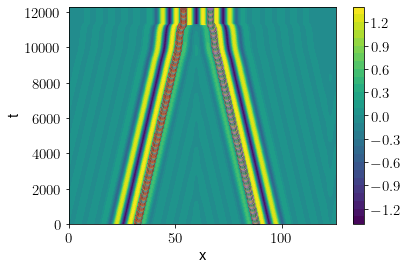

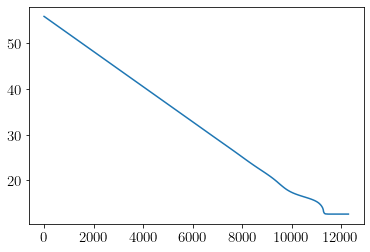

In [2]:
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rc('text', usetex=True)

#set font sizes
SMALL_SIZE = 15
MEDIUM_SIZE = 15

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize



res = 8192
dt = 0.01
eps = 0.03
estro = 101
domain_size = 40*np.pi
dx = domain_size/res

#Margin of error for each norm calculation is 0.001




L = domain_size;
n = res

xt_data = np.loadtxt('/Users/mathiraja/Desktop/higher_res/8192/+a4_-a4/xt65.dat')
space = L/n*np.arange(len(xt_data[0,:]))
time  = dt*estro*np.arange(len(xt_data[:,0]))

S,T = np.meshgrid(space,time)
#print(space)
plt.contourf(S,T,xt_data,levels=30)
##########################
# line to guide eye on diagonal
###########################

##################################
print("Finding peaks using derivative method")
peak_number = 3
counter = 0
dudx = np.diff(xt_data)/(dx)
signs = np.sign(dudx)
mxl = []
mxr = []
for i in range(len(xt_data)):
    arrl = []
    arrr = []
    for j in range(len(dudx[0])-1):
        if signs[i][j] == -1 and (signs[i][j+1] == 0 or signs[i][j+1] == 1) and xt_data[i][j+1]< -0.6:
            arrl.append(j+1)
    for k in range(len(dudx[0])-1, 1, -1):
        if signs[i][k-1] == -1 and (signs[i][k] == 0 or signs[i][k] == 1) and xt_data[i][k]< -0.6:
            arrr.append(k)
    mxl.append(arrl)
    mxr.append(arrr)
    

mxr = np.array(mxr)
mxl = np.array(mxl)

diff = []
for i in range(len(mxr)):
    diff.append(space[mxr[i][1]] - space[mxl[i][1]])
diff = np.array(diff)

print("Completed peaks using derivative method")

##########################################################
        
for k in range(int(len(time))):
    plt.plot(space[mxr[k][1]],time[k],'.',markersize=10)
    plt.plot(space[mxl[k][1]],time[k],'.',markersize=10)


plt.ylim(ymin=0,ymax=max(time))
plt.xlim(xmin=0,xmax=max(space))
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()
#plt.savefig('asym1_sym2_opposite_front_facing.png')



plt.figure(2)
#plt.plot(time, d)
plt.plot(time, diff)
#plt.plot(time,dr,'.')
#plt.plot(time, 500*np.cos(1.06*d2)*np.exp(-0.38*np.abs(d2)))
#plt.savefig('')
plt.show()

#########################################################

#np.diff(space)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

[[-27.94146005  27.94146005]
 [-27.9414408   27.9414408 ]
 [-27.94142155  27.94142155]
 ...
 [ -5.95642528   5.95642528]
 [ -5.95642528   5.95642528]
 [ -5.95642528   5.95642528]]
-11.912850557285635
[-11.912850557285635]


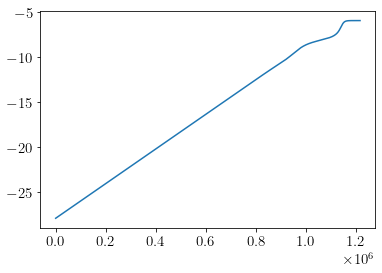

In [4]:
def f(x):
    beta = 1.0688
    alpha = .3772
    c =  0.001925 #0.00199368 #need to change as well
    g = 0.6 #need to change this factor (0.8)
    p = 4.83671 #-1.04201666 #2600/beta #phase shift
    p = -1.04201666
    x1 = x[0]
    x2 = x[1]
    d = np.abs(x1-x2)
    f  = np.array([c - g*np.cos(beta*(d-p))*np.exp(-alpha*d), -c + g*np.cos(beta*(d-p))*np.exp(-alpha*d)])
    return f


# initialising
diffs = []
a = diff[0]/2
N = len(diff)*100 #Number of time steps
dt = 0.01 #time step
#time  = dt*estro*np.arange(len(xt_data[:,0]))
time2 = dt*np.arange(N)/100
#time = np.linspace(0,dt*N,N)*10
xvec = np.zeros((N,2))
x = [-a,a]


# the RK loop
for i in range(N):
    if np.abs(x[0] - x[1]) < 1:
        break
    xvec[i] = x
    k1 = f(x) * dt
    k2 = f(x+k1/2) *dt
    k3 = f(x+k2/2) * dt
    k4 = f(x+k3) * dt
    dx = (k1 + 2*k2 + 2*k3 + k4) / 6
    x = x + dx
    
print(xvec)

plt.plot(xvec[:,0])

print(xvec[-1,0] - xvec[-1,1])
diffs.append(xvec[-1,0] - xvec[-1,1])
print(diffs)

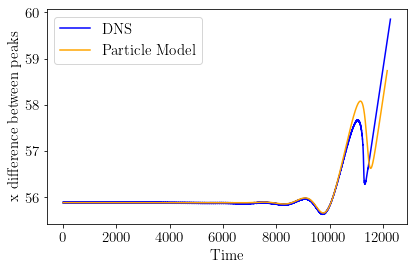

In [5]:
#NORMAL DNS/PARTICLE MODEL
time2 = np.array([i*dt for i in range(N)])
c =  0.001925
#c2 =  -0.001926
plt.plot(time, diff+2*c*time, color = 'blue', label = r'\textrm{DNS}') #dns diff

plt.plot(time2, -(xvec[:,0] - xvec[:,1]-2*c*time2), color = 'orange', label = r'\textrm{Particle Model}') #rk diff
plt.xlabel(r'\textrm{Time}')
plt.ylabel(r'\textrm{x difference between peaks}')
#plt.title(r'\textrm{Difference vs Time (zoomed)}')
plt.legend()
#plt.ylim([55.5,56.3])
plt.tight_layout()
#plt.savefig('head_on_diff_vs_time.pdf', dpi = 300)
plt.show()

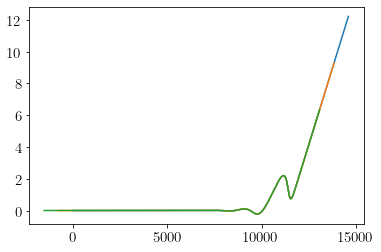

In [6]:
#vary by starting position but keeping phase shift the same

wavelengths = np.array([0, 1/2, 1])

def f(x):
    beta = 1.0688
    alpha = .3772
    c =  0.001925 #0.00199368 #need to change as well
    g = 0.6 #need to change this factor (0.8)
    p = -1.04201666#phase shift
    x1 = x[0]
    x2 = x[1]
    d = np.abs(x1-x2)
    f  = np.array([c - g*np.cos(beta*(d-p))*np.exp(-alpha*d), -c + g*np.cos(beta*(d-p))*np.exp(-alpha*d)])
    return f


# initialising
xvecs = []
for j in range(len(wavelengths)):
    beta = 1.0688
    T = 2*np.pi/beta
    w = wavelengths[j]
    p = -1.04201666#phase shift
    a = diff[0]/2+T*w/2
    N = len(diff)*120 #Number of time steps
    dt = 0.01 #time step
    c =  0.001925
    time  = dt*estro*np.arange(len(xt_data[:,0]))
    time2 = np.array([i*dt for i in range(N)])
    #time = np.linspace(0,dt*N,N)*10
    xvec = np.zeros((N,2))
    x = [-a,a]

    # the RK loop
    for i in range(N):
        if np.abs(x[0] - x[1]) < 1:
            break
        xvec[i] = x
        k1 = f(x) * dt
        k2 = f(x+k1/2) *dt
        k3 = f(x+k2/2) * dt
        k4 = f(x+k3) * dt
        dx = (k1 + 2*k2 + 2*k3 + k4) / 6
        x = x + dx
    xvecs.append(xvec)
    plt.plot(time2-(T*w)/(2*c), xvecs[j][:,1] - xvecs[j][:,0]+2*c*time2 - (2*a), label = r'\textrm{Particle Model}') #rk diff

In [7]:
#Create loop to run the runge-kutta with different parameters and create a data structure to plot them simultaneously/with switches
#Compare model to other models with shift (should compare exactly when shifted by 2pi/beta)
#[0, 1/2, 1] use different lines, etc.

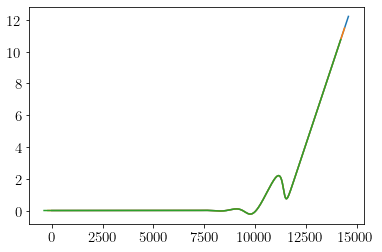

In [8]:
#vary by starting position but keeping phase shift the same

wavelengths = np.array([0, 1/8, 1/4])

def f(x):
    beta = 1.0688
    alpha = .3772
    c =  0.001925 #0.00199368 #need to change as well
    g = 0.6 #need to change this factor (0.8)
    p = -1.04201666#phase shift
    x1 = x[0]
    x2 = x[1]
    d = np.abs(x1-x2)
    f  = np.array([c - g*np.cos(beta*(d-p))*np.exp(-alpha*d), -c + g*np.cos(beta*(d-p))*np.exp(-alpha*d)])
    return f


# initialising
xvecs = []
for j in range(len(wavelengths)):
    beta = 1.0688
    T = 2*np.pi/beta
    w = wavelengths[j]
    p = -1.04201666#phase shift
    a = diff[0]/2+T*w/2
    N = len(diff)*120 #Number of time steps
    dt = 0.01 #time step
    c =  0.001925
    time  = dt*estro*np.arange(len(xt_data[:,0]))
    time2 = np.array([i*dt for i in range(N)])
    #time = np.linspace(0,dt*N,N)*10
    xvec = np.zeros((N,2))
    x = [-a,a]

    # the RK loop
    for i in range(N):
        if np.abs(x[0] - x[1]) < 1:
            break
        xvec[i] = x
        k1 = f(x) * dt
        k2 = f(x+k1/2) *dt
        k3 = f(x+k2/2) * dt
        k4 = f(x+k3) * dt
        dx = (k1 + 2*k2 + 2*k3 + k4) / 6
        x = x + dx
    xvecs.append(xvec)
    plt.plot(time2-(T*w)/(2*c), xvecs[j][:,1] - xvecs[j][:,0]+2*c*time2 - (2*a), label = r'\textrm{Particle Model}') #rk diff

In [ ]:
for j in range(len(wavelengths)):
    for i in range(N):
        beta = 1.0688
        T = 2*np.pi/beta
        w = wavelengths[j]
        a = diff[0]/2+T*w/2
        plt.plot(time2-(T*w)/(2*c), xvecs[j][:,1] - xvecs[j][:,0]+2*c*time2 - (2*a)) #rk diff
    
